# Multilayer Perceptron(MLP)

- https://www.lizenghai.com/archives/29120.html

FutureWarning

每次跑代码都出来这个警告，其实就是numpy的版本比较高。

## 解决方法

先卸载numpy：

- pip3 uninstall numpy

再安装，据说只要在1.17以下均可
### mlxtend 0.17.0 has requirement numpy>=1.16.2
- pip3 install numpy==1.16.2


In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
%matplotlib inline
# 我們會使用到一些內建的資料庫, MAC 需要加入以下兩行, 才不會把對方的 ssl 憑證視為無效
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

Using TensorFlow backend.


In [2]:
# 回傳值: ((訓練特徵, 訓練目標), (測試特徵, 測試目標))
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
print("訓練資料筆數:", len(y_train))
print("測試資料筆數:", len(y_test))

訓練資料筆數: 60000
測試資料筆數: 10000


In [4]:
print("特徵的維度:", x_train.shape)

特徵的維度: (60000, 28, 28)


In [5]:
import pandas as pd
# 為了顯示的漂亮, 我刻意的把印出來的 row 只顯示 15 個和 column 只顯示 10 個
# 大家練習的時候可以去掉下面兩行
# pd.set_option('display.max_rows', 15)
# pd.set_option('display.max_columns', 10)

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [6]:
from keras.utils import np_utils
# reshape 讓他從 32 * 32 變成 784 * 1 的一維陣列
# 除以 255 讓我們標準化到 0-1 區間
x_train_shaped = x_train.reshape(60000, 784).astype("float32") / 255
x_test_shaped = x_test.reshape(10000, 784).astype("float32") / 255
# keras 要求你的分類輸出必須換成 One-hot 模式
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [7]:
print("One-hot 前:", y_train[0])
print("One-hot 後:", y_train_cat[0])

One-hot 前: 5
One-hot 後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
a = int(input("請輸入你想可視化的圖片 [0-59999]:"))
print("你想可視化的圖片號碼是", a)
print("圖片答案是", y_train[a])

請輸入你想可視化的圖片 [0-59999]:45
你想可視化的圖片號碼是 45
圖片答案是 9


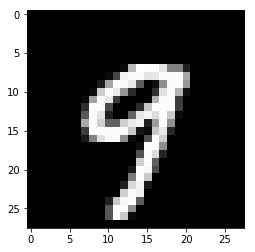

In [9]:
plt.imshow(x_train[a],cmap='gray')

In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 一層隱藏層的模型，第一個隱藏層記得要寫出特徵的數目: input_dim
h_layer = Dense(units = 256,
input_dim = 784,
kernel_initializer = "random_normal",
activation = "relu")
model.add(h_layer)
o_layer = Dense(units = 10,
kernel_initializer = "random_normal",
activation = "softmax")
model.add(o_layer)

W0823 20:16:00.661903  1164 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0823 20:16:00.674870  1164 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0823 20:16:00.676863  1164 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4409: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



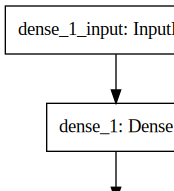

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="categorical_crossentropy",
optimizer = "adam",
metrics = ['accuracy'])

W0823 20:27:26.925146  1164 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0823 20:27:26.943098  1164 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
train_history = model.fit(x = x_train_shaped, y = y_train_cat,
validation_split = 0.1,
epochs = 10,
batch_size = 200,
verbose = 2)

W0823 20:27:58.206832  1164 deprecation.py:323] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0823 20:27:58.241740  1164 deprecation_wrapper.py:119] From c:\users\big data\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 3s - loss: 0.4173 - acc: 0.8884 - val_loss: 0.1785 - val_acc: 0.9520
Epoch 2/10
 - 1s - loss: 0.1797 - acc: 0.9484 - val_loss: 0.1202 - val_acc: 0.9657
Epoch 3/10
 - 1s - loss: 0.1263 - acc: 0.9643 - val_loss: 0.0987 - val_acc: 0.9740
Epoch 4/10
 - 1s - loss: 0.0955 - acc: 0.9727 - val_loss: 0.0903 - val_acc: 0.9737
Epoch 5/10
 - 1s - loss: 0.0774 - acc: 0.9776 - val_loss: 0.0863 - val_acc: 0.9745
Epoch 6/10
 - 1s - loss: 0.0619 - acc: 0.9823 - val_loss: 0.0842 - val_acc: 0.9768
Epoch 7/10
 - 1s - loss: 0.0515 - acc: 0.9859 - val_loss: 0.0733 - val_acc: 0.9772
Epoch 8/10
 - 1s - loss: 0.0432 - acc: 0.9882 - val_loss: 0.0708 - val_acc: 0.9785
Epoch 9/10
 - 1s - loss: 0.0351 - acc: 0.9908 - val_loss: 0.0690 - val_acc: 0.9792
Epoch 10/10
 - 1s - loss: 0.0289 - acc: 0.9924 - val_loss: 0.0712 - val_acc: 0.9785


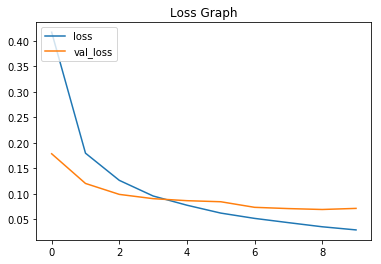

In [15]:
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["val_loss"])
plt.title("Loss Graph")
plt.legend(['loss', 'val_loss'], loc="upper left")

In [16]:
pre = model.predict_classes(x_test_shaped)
print("預測標籤:", list(pre[:5]))
print("正確標籤:", list(y_test)[:5])

預測標籤: [7, 2, 1, 0, 4]
正確標籤: [7, 2, 1, 0, 4]


In [17]:
e = model.evaluate(x_test_shaped, y_test_cat)
print("衡量係數:", e)
print("正確率:", e[1] * 100, "%")

10000/10000 [==============================] - 0s 36us/step
衡量係數: [0.0704252230306156, 0.9774]
正確率: 97.74000000000001 %


In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,968,0,3,1,0,1,5,1,1,0
1,0,1124,4,0,0,2,2,0,3,0
2,2,0,1015,3,1,0,2,4,5,0
3,0,0,7,984,0,7,0,2,4,6
4,1,0,6,0,955,0,2,2,1,15
5,2,0,0,8,1,870,3,1,3,4
6,6,3,2,1,3,6,934,0,3,0
7,1,5,12,1,0,0,0,1003,0,6
8,4,0,6,7,5,5,1,4,939,3
9,2,5,0,8,7,1,0,3,1,982
